In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_ok = pd.read_excel('../data/interim/dataframe_limpio.xlsx')

In [4]:
import joblib

# Cargar el modelo de regresion lineal
modelo_regresion = joblib.load('../models/regresion_lineal_model.pkl')

# Cargar el modelo de Random Forest (opcional)
modelo_random_forest = joblib.load('../models/random_forest_model.pkl')


In [5]:
# Definir los valores de las características (ejemplo: "Grandes Demandas", "Uso Residencial", "Uso General")
X = df_ok['Año'].values.reshape(-1, 1)

# Extrapolar para "Grandes Demandas"
y_grandes_demandas = df_ok['Grandes Demandas'].values
modelo_grandes_demandas = modelo_regresion
modelo_grandes_demandas.fit(X, y_grandes_demandas)
grandes_demandas_2050 = modelo_grandes_demandas.predict([[2050]])

# Extrapolar para "Uso Residencial"
y_uso_residencial = df_ok['Uso Residencial'].values
modelo_uso_residencial = modelo_regresion
modelo_uso_residencial.fit(X, y_uso_residencial)
uso_residencial_2050 = modelo_uso_residencial.predict([[2050]])

# Extrapolar para "Uso General"
y_uso_general = df_ok['Uso General'].values
modelo_uso_general = modelo_regresion
modelo_uso_general.fit(X, y_uso_general)
uso_general_2050 = modelo_uso_general.predict([[2050]])

# Crear el DataFrame para la predicción de 2050
nuevo_dato_2050 = pd.DataFrame({
    'Año': [2050],
    'Grandes Demandas': grandes_demandas_2050,
    'Uso Residencial': uso_residencial_2050,
    'Uso General': uso_general_2050
})

# Mostrar las predicciones de las características para 2050
print("Características predichas para 2050:")
print(nuevo_dato_2050)


Características predichas para 2050:
    Año  Grandes Demandas  Uso Residencial   Uso General
0  2050      4.977064e+07     2.319640e+07  2.319640e+07


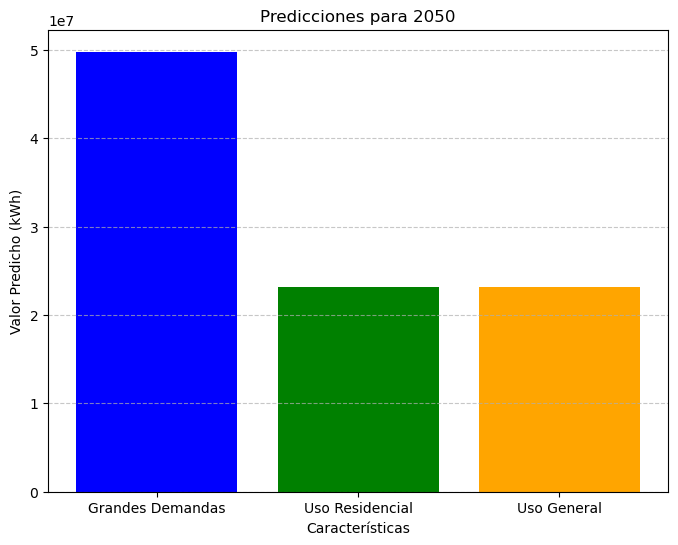

In [14]:
# Crear un gráfico de barras para mostrar las predicciones para 2050
plt.figure(figsize=(8, 6))
predicciones = nuevo_dato_2050.drop('Año', axis=1).values.flatten()  # Eliminar la columna 'Año'
etiquetas = ['Grandes Demandas', 'Uso Residencial', 'Uso General']

plt.bar(etiquetas, predicciones, color=['blue', 'green', 'orange'])

# Añadir etiquetas y título
plt.xlabel('Características')
plt.ylabel('Valor Predicho (kWh)')
plt.title('Predicciones para 2050')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


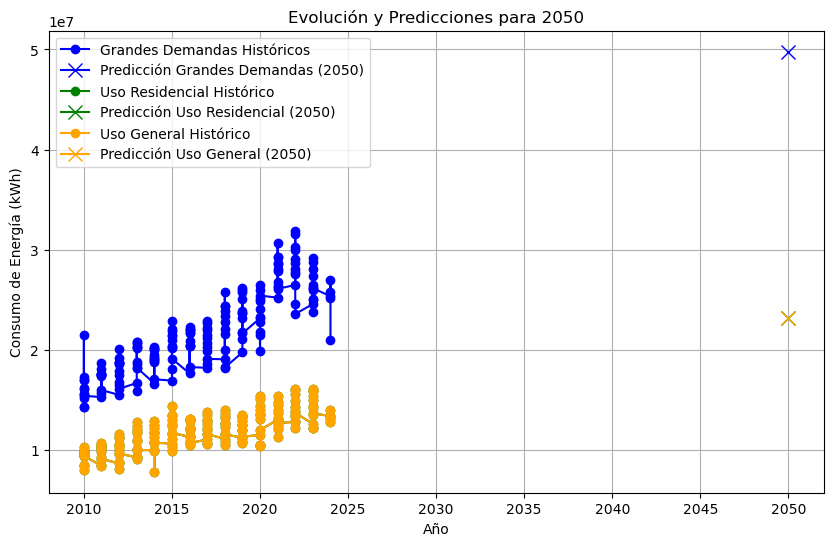

In [16]:
# Agregar el año 2050 y sus predicciones a los datos históricos
años_historicos = df_ok['Año'].values
grandes_demandas_historico = df_ok['Grandes Demandas'].values
uso_residencial_historico = df_ok['Uso Residencial'].values
uso_general_historico = df_ok['Uso General'].values

# Predicciones para 2050
años_prediccion = [2050]
grandes_demandas_prediccion = grandes_demandas_2050[0]
uso_residencial_prediccion = uso_residencial_2050[0]
uso_general_prediccion = uso_general_2050[0]

# Crear una figura y un conjunto de subgráficos
plt.figure(figsize=(10, 6))

# Graficar "Grandes Demandas"
plt.plot(años_historicos, grandes_demandas_historico, label='Grandes Demandas Históricos', color='blue', marker='o')
plt.plot(años_prediccion, grandes_demandas_prediccion, label='Predicción Grandes Demandas (2050)', color='blue', marker='x', markersize=10)

# Graficar "Uso Residencial"
plt.plot(años_historicos, uso_residencial_historico, label='Uso Residencial Histórico', color='green', marker='o')
plt.plot(años_prediccion, uso_residencial_prediccion, label='Predicción Uso Residencial (2050)', color='green', marker='x', markersize=10)

# Graficar "Uso General"
plt.plot(años_historicos, uso_general_historico, label='Uso General Histórico', color='orange', marker='o')
plt.plot(años_prediccion, uso_general_prediccion, label='Predicción Uso General (2050)', color='orange', marker='x', markersize=10)

# Añadir título, etiquetas y leyenda
plt.title('Evolución y Predicciones para 2050')
plt.xlabel('Año')
plt.ylabel('Consumo de Energía (kWh)')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()
